## Background:

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.


Bank provided data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Data Descripsion							
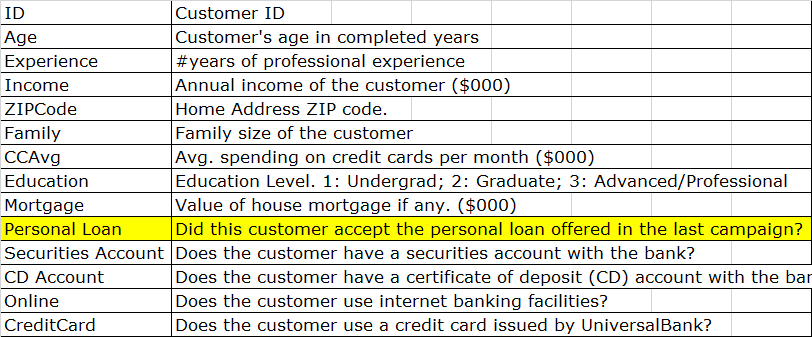

## Problem Statement:
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.


In [ ]:
#import the needed packages

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,roc_auc_score, confusion_matrix, accuracy_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV
#from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn import metrics
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import warnings

import sklearn
import scipy

import sys
import os




# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir())
# Any results you write to the current directory are saved as output.

['1.ipynb', 'Bank_Personal_Loan_Modelling.csv', 'image.png', 'personal-loan-prediction.ipynb', 'project1.ipynb', 'Python_Linear_Regres.csv', 'Python_Linear_Regres1.csv', 'requirements.txt', 'venv']


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import the data to bank_df
bank_df=pd.read_csv("D:\harshit python\machine learning\Bank_Personal_Loan_Modelling.csv")

In [4]:
bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [5]:
bank_df.shape

(5000, 14)

## Initial Data Analysis:

Initial data analysis in primary step for data analytics. Mostly its cover as part of EDA. But as name suggest,EDA is exploritary data analysis is done to analyze each of feature in data set to get some inferance or for the Hypothesis.

IDA on other hand perform to get familiar with data set. To identify the dependent and independent variable in data set. IDA step consists of :

    1. Shape of the data. Row and Column count.
    2. Get to know datatypes of the features of the dataset.
    3. Initial descritive analysis.
    4. Check if the missing values are present.
    4. Check if the data set in balanced dataset or not.

In [6]:
# Shape of training and test data set
def dataframe_shape(df):
    print("The dataframe has %d rows" %df.shape[0])
    print("The dataframe has %d columns" %df.shape[1])

dataframe_shape(bank_df)

The dataframe has 5000 rows
The dataframe has 14 columns


In [31]:
# Columns/Feature in dataset
pd.DataFrame(bank_df.columns,index=None,copy=False).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [28]:
# First 3 observation
bank_df.head(3) # you can choose any number of rows by changing the number inside head function. Default it shows 5

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [8]:
# Last 3 observation
bank_df.tail(3) # you can choose any number of rows by changing the number inside tail function. Default it shows 5

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [9]:
# Random 3 observation
bank_df.sample(3) # you can choose any number of rows by changing the number inside sample function. Default it shows 1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2370,2371,33,7,51,94040,4,2.1,3,0,0,0,0,0,1
1859,1860,67,41,20,91741,2,0.4,1,80,0,0,0,0,0
1920,1921,54,28,31,92130,2,0.4,3,0,0,0,0,0,0


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64


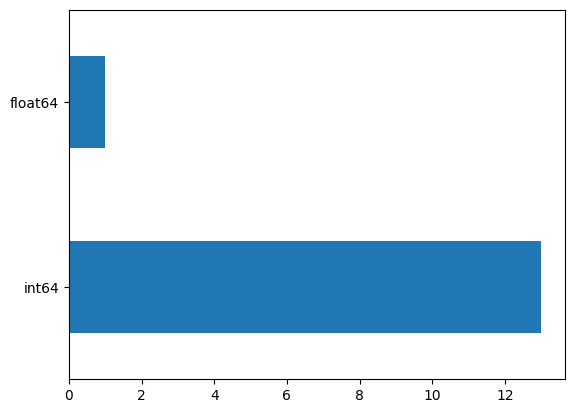

In [7]:
# datatypes present into training dataset
def datatypes_insight(data):
    display(data.dtypes.to_frame().T)
    data.dtypes.value_counts().plot(kind="barh")
datatypes_insight(bank_df)

In [59]:
bank_df.isnull()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


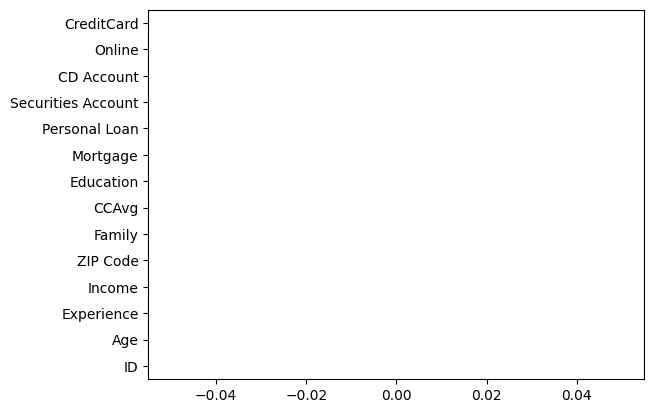

In [6]:
# Missing value identification

def Nan_value(data):
    display(data.apply(lambda x: sum(x.isnull())).to_frame().T)
    data.apply(lambda x: sum(x.isnull())).plot(kind="barh")

Nan_value(bank_df)

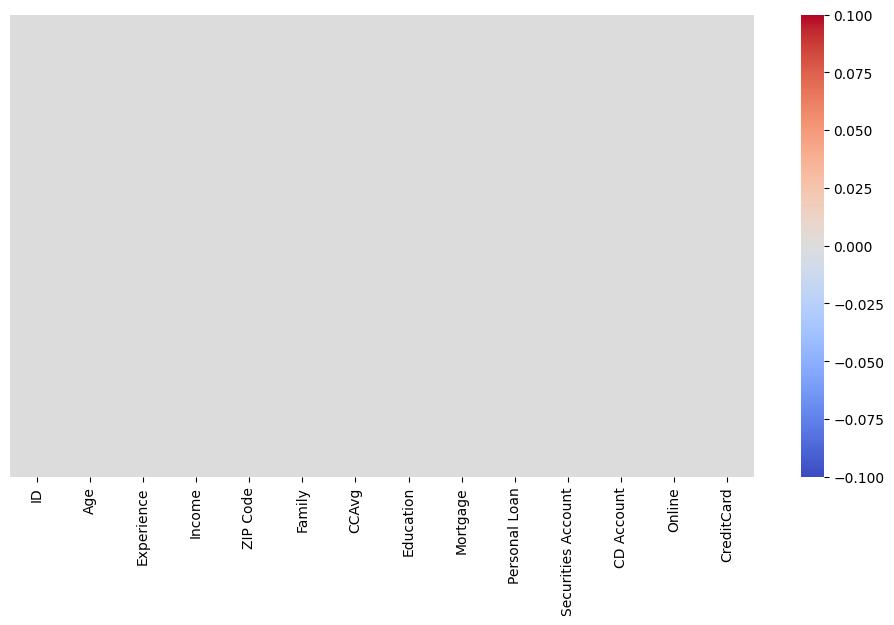

In [65]:
plt.figure(figsize=(12, 6))
sns.heatmap(bank_df.isna(), cmap="coolwarm", cbar=True, yticklabels=False)
plt.show()


<Figure size 1200x600 with 0 Axes>

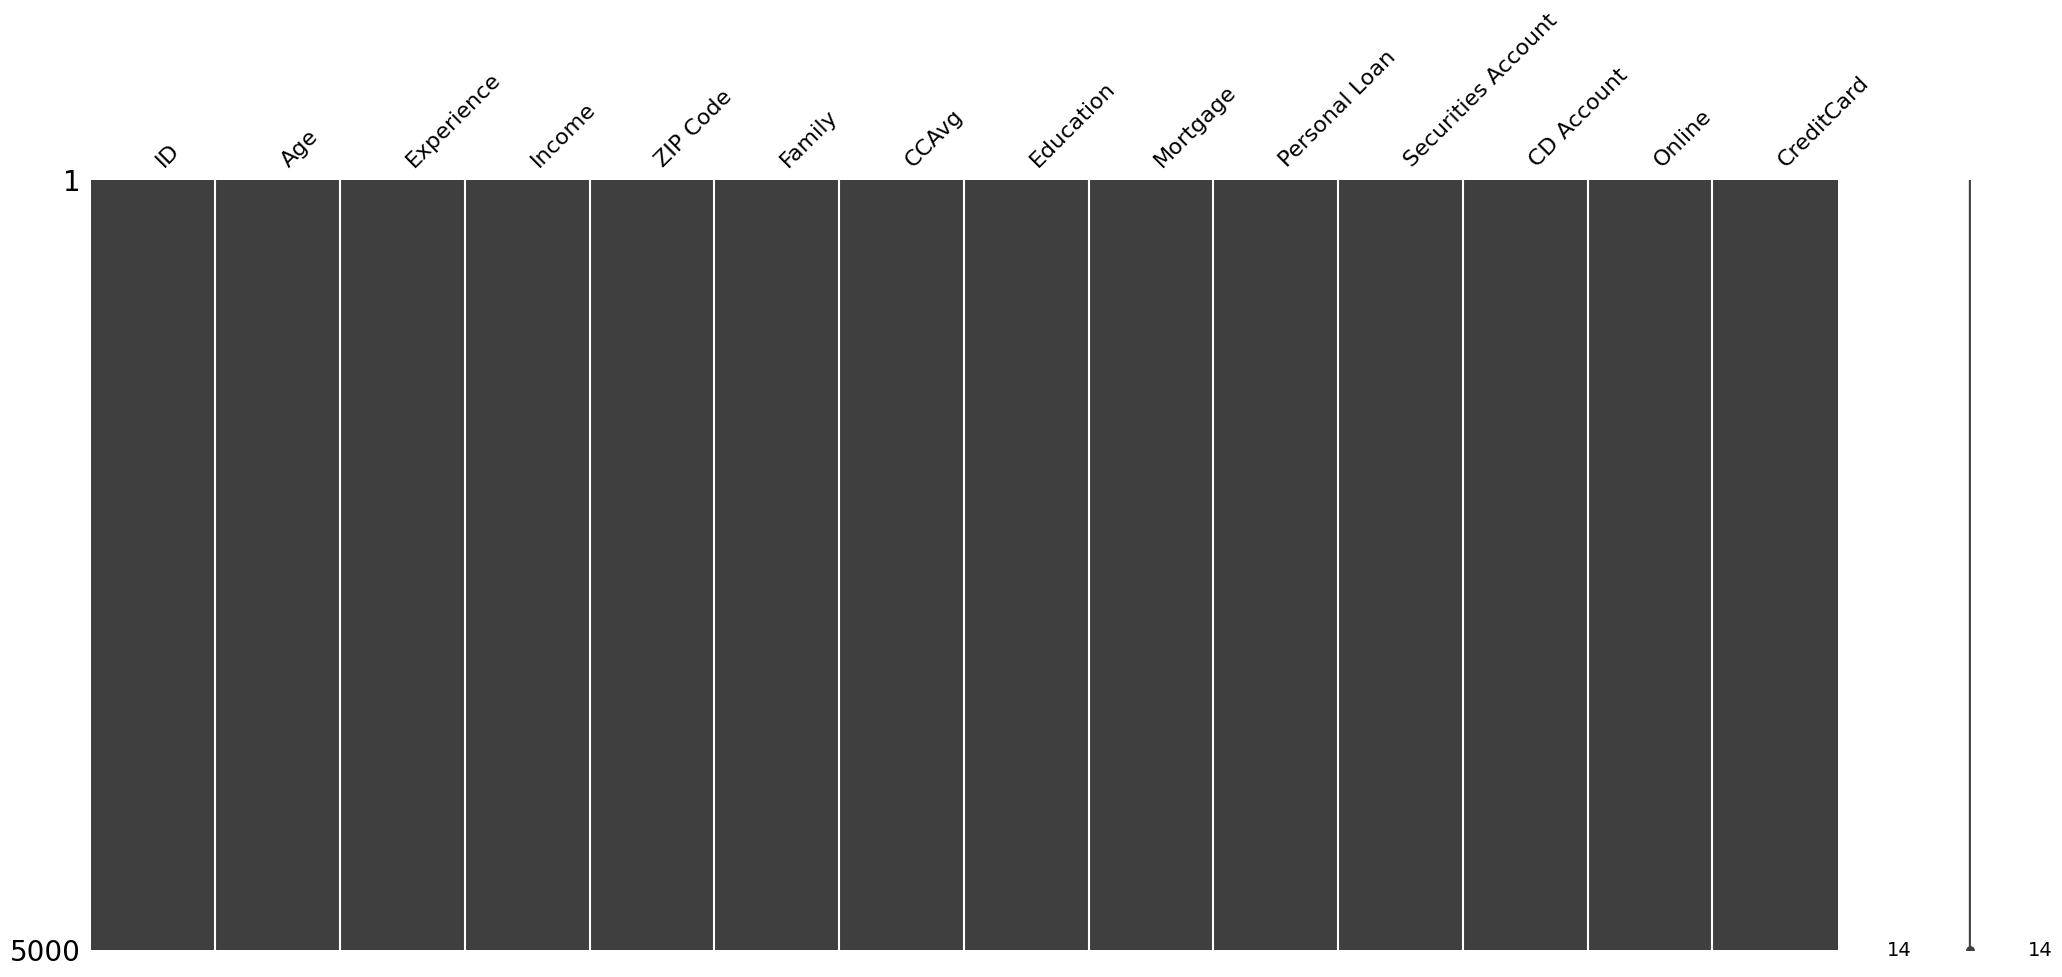

In [67]:
import missingno as msno
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust size as needed
msno.matrix(bank_df)
plt.show()


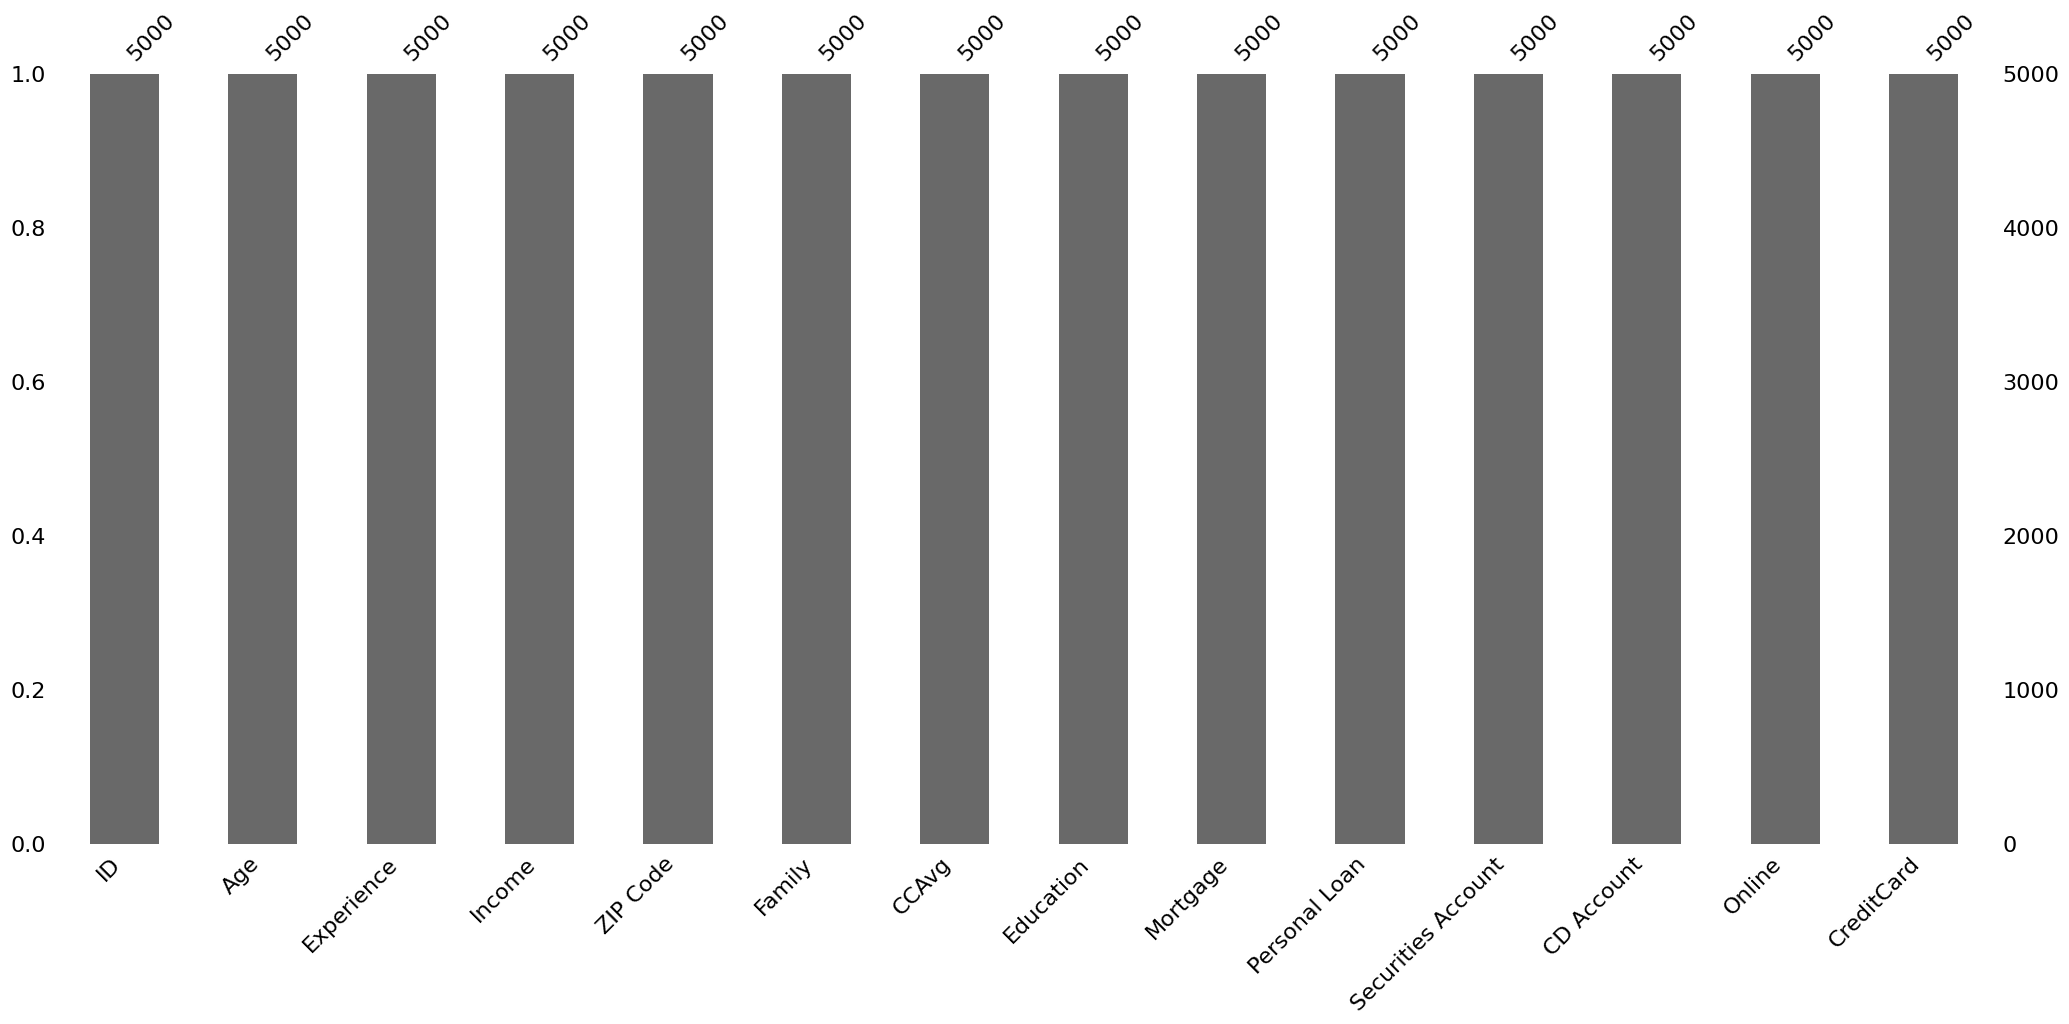

In [68]:
plt.figure(figsize=(12, 6))
msno.bar(bank_df)
plt.show()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,5000,45,47,162,467,4,108,3,347,2,2,2,2,2


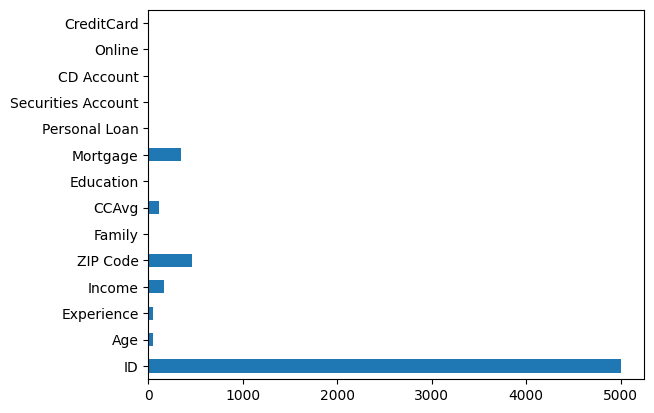

In [ ]:
# Unique values in features
def unique_data(data):
    display(data.apply(lambda x: len(x.unique())).to_frame().T)
    data.apply(lambda x: len(x.unique())).plot(kind="barh")

unique_data(bank_df)

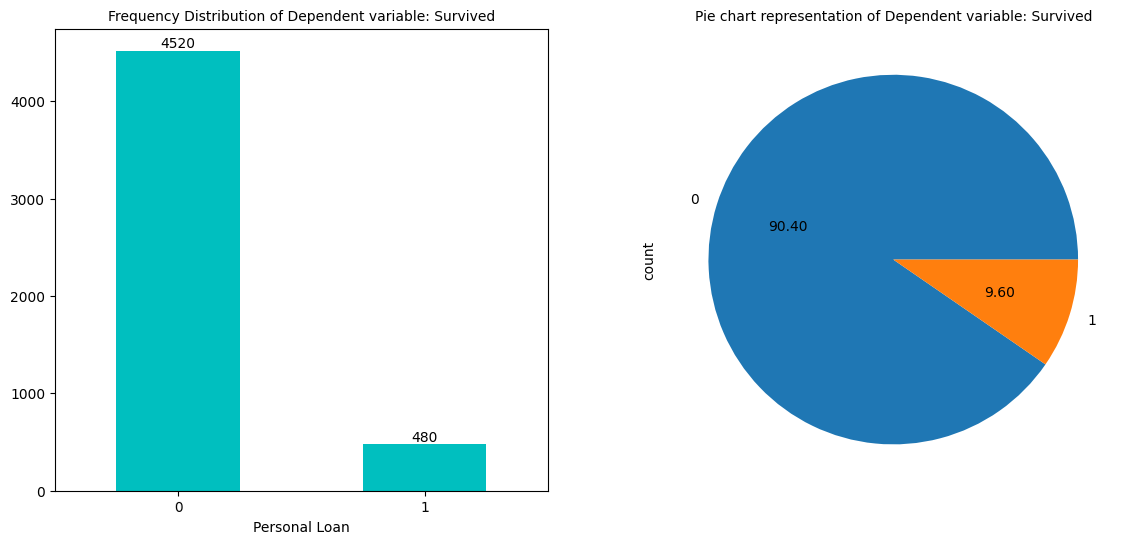

In [10]:
# check for imbalance dataset
fig, ax = plt.subplots(nrows=1, ncols=2,squeeze=True)
fig.set_size_inches(14,6)
frequency_colums= pd.crosstab(index=bank_df["Personal Loan"],columns="count")
frequency_colums.plot(kind='bar',ax=ax[0],color="c",legend=False,rot=True,fontsize=10)
frequency_colums.plot(kind='pie',ax=ax[1],subplots=True,legend=False,fontsize=10,autopct='%.2f')
ax[0].set_title('Frequency Distribution of Dependent variable: Survived',fontsize=10)
ax[1].set_title('Pie chart representation of Dependent variable: Survived',fontsize=10)

#adding the text labels
rects = ax[0].patches
labels = frequency_colums["count"].values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height +1,label, ha='center', va='bottom',fontsize=10)
plt.show()

## Observation/Inferance from IDA- Initial Data Analysis:
1. Dataset has 5000 records with 14 features/variable. Data is not huge.
2. In Dataset we have mostly Integer data types.
3. There is NO missing value present in dataset.Thats great.
4. Dataset is likely to be imbalanced dataset.There ratio of Opted Personal Loan vs not opted is less than 90:10.We may need to find out a way to balance those 2 class.

## Data Visualization and Insight-EDA(Exploratory Data Analysis)

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand.

## Univariate Analysis:

In [15]:
#statistical analysis of data set
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


##### Observation: 
Experience minimum is -3.Experience can not be negetive value.We will treat this condition later.Assumption is Experience and Age are related.

### Data Distribution of each feature:

In [15]:
# for i in range (2):
#         print(i)
#         for j in range (2):
#                 print(j)
col_value=bank_df.columns.values.tolist()
col_value

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

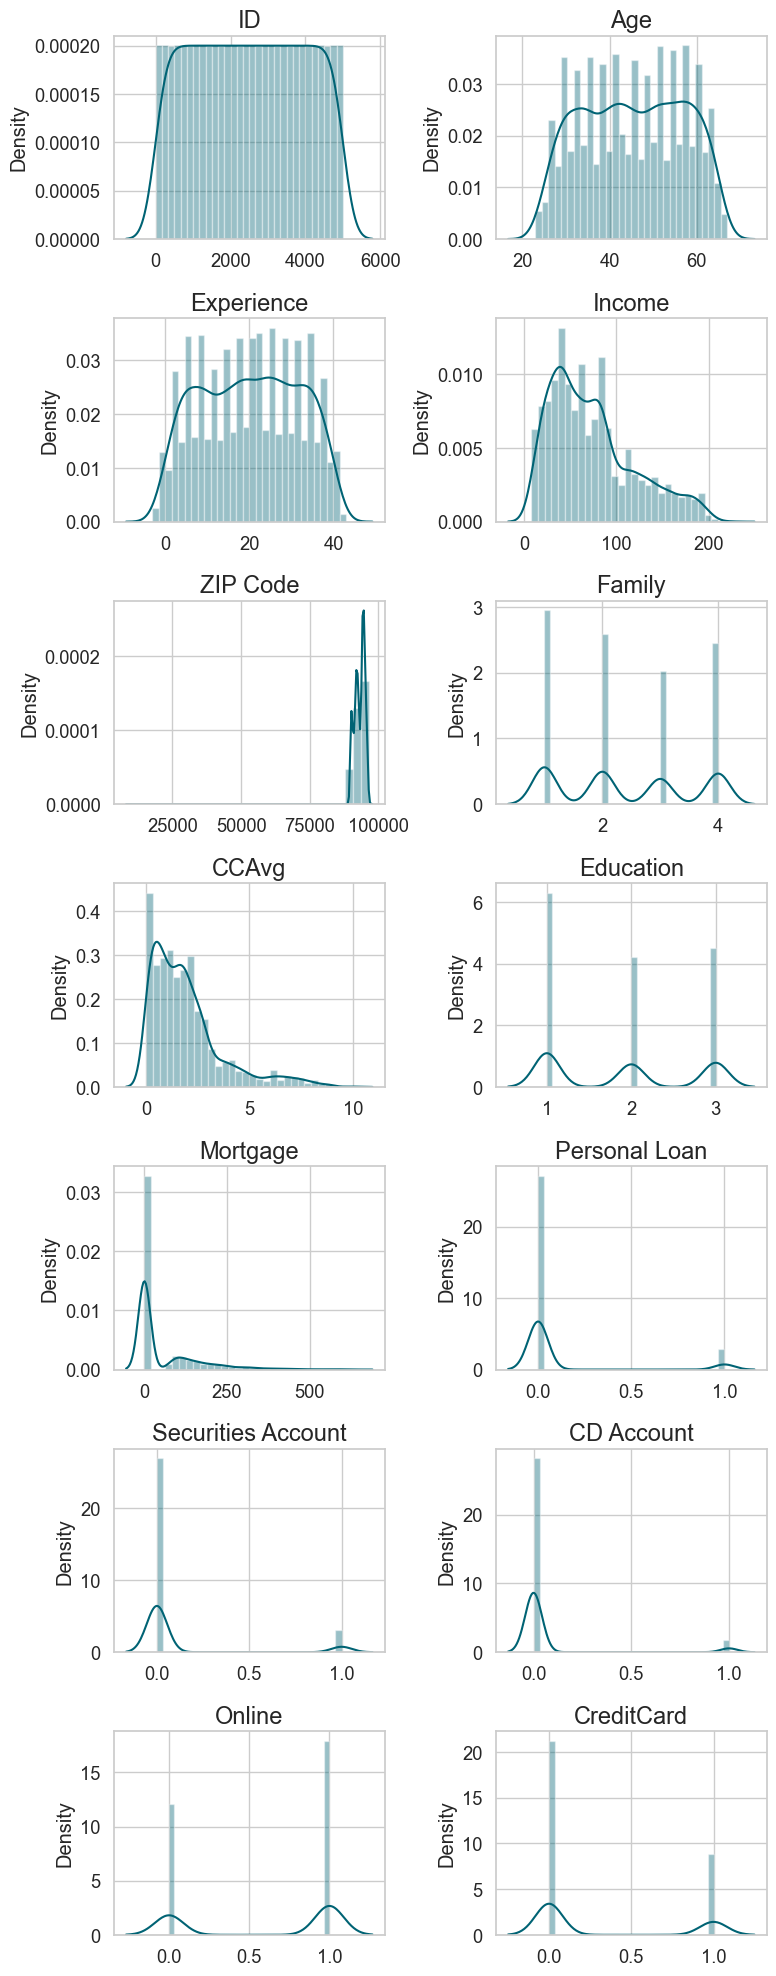

In [11]:
def distploting(df):
    col_value=df.columns.values.tolist()
    sns.set(context='notebook',style='whitegrid', palette='dark',font='sans-serif',font_scale=1.2,color_codes=True)
    
    fig, axes = plt.subplots(nrows=7, ncols=2,constrained_layout=True)
    count=0
    for i in range (7):
        for j in range (2):
            s=col_value[count+j]
            #axes[i][j].hist(df[s].values,color='c')
            sns.distplot(df[s].values,ax=axes[i][j],bins=30,color="c")
            axes[i][j].set_title(s,fontsize=17)
            fig=plt.gcf()
            fig.set_size_inches(8,20)
            plt.tight_layout()
        count=count+j+1
        
             
distploting(bank_df)

#### These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based.
Among other things this helps us select the appropriate plots for visualization.
### Categorical feature:
###### ordinal:
- Family
- Education
###### nominal:
- ID
- Zip Code
- Securities Account
- CD Account
- Online
- Credit Card
### Numerical feature:
- Age
- Experience
- Income
- CCAvg
- Mortage

# Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

#### Correlating.

We want to know how well does each feature correlate with personal loan acceptance. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

#### Creating.

1. We may want to engineer the Mortgage & income feature to see the mortgage raitio vs income(monthly).
2. We may want to engineer the Income & CCAvg feature to see the CCAvg raitio vs income(monthly).
3. We may want to create new feature for Age and Experience bands. This turns a continous numerical feature into an ordinal categorical feature.

## Bi-Variate Analysis - With Pivot Table for Catagorical variable:

In [21]:
bank_df[['CreditCard', 'Personal Loan']].groupby(['CreditCard'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,CreditCard,Personal Loan
1,1,0.097279
0,0,0.095467


In [18]:
bank_df[['Online', 'Personal Loan']].groupby(['Online'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,Online,Personal Loan
1,1,0.09752
0,0,0.09375


In [19]:
bank_df[['Family', 'Personal Loan']].groupby(['Family'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,Family,Personal Loan
2,3,0.131683
3,4,0.109656
1,2,0.081790
0,1,0.072690


In [20]:
bank_df[['Education', 'Personal Loan']].groupby(['Education'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,Education,Personal Loan
2,3,0.136576
1,2,0.129722
0,1,0.044370


In [21]:
bank_df[['CD Account', 'Personal Loan']].groupby(['CD Account'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,CD Account,Personal Loan
1,1,0.463576
0,0,0.072371


In [22]:
bank_df[['Securities Account', 'Personal Loan']].groupby(['Securities Account'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,Securities Account,Personal Loan
1,1,0.114943
0,0,0.093792


##### Observation by analyzing pivoting features:
1. **CD_Account: **We observe significant correlation (~0.5) among CD_Account=1 and Personal_Loan Accepted We decide to include this feature in our model.

2. **Securities Account/Education/Family: **We observe mild correlation (>.1) with Personal_Loan Accepted.We decide to include these features in our model.

3. **Credit_Card/Online(NetBanking Facility): **We observe less correlation (less than .1) with Personal_Loan Accepted.We may would  like to exclude both these features from our model.

# Analyze by visualizing data
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.Let us start by understanding correlations between numerical features and our solution goal (Personal loan accepted).

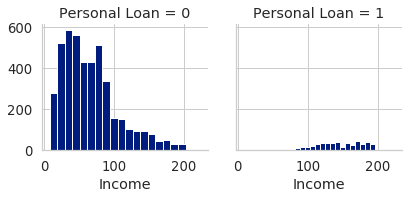

In [23]:
g = sns.FacetGrid(bank_df, col='Personal Loan')
g.map(plt.hist,'Income', bins=20)

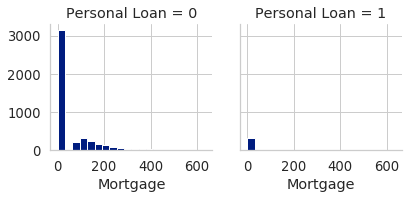

In [24]:
g = sns.FacetGrid(bank_df, col='Personal Loan')
g.map(plt.hist,'Mortgage', bins=20)

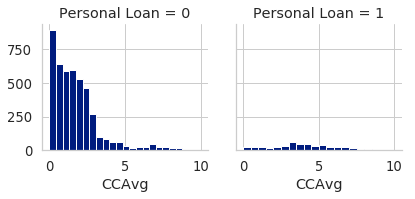

In [25]:
g = sns.FacetGrid(bank_df, col='Personal Loan')
g.map(plt.hist,'CCAvg', bins=20)

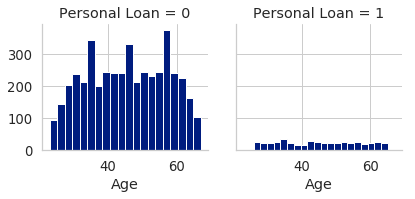

In [26]:
g = sns.FacetGrid(bank_df, col='Personal Loan')
g.map(plt.hist,'Age', bins=20)

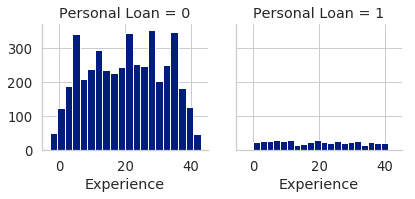

In [27]:
g = sns.FacetGrid(bank_df, col='Personal Loan')
g.map(plt.hist,'Experience', bins=20)

##### Observations.

1. Customer having less income (Income<=100K) had high rejection rate.
2. Customer having 0 Mortgage had high rejection rate.
3. Customer having low CCAvg mostly rejected Personal loan offer. Custer having CCAvg between 2.5 to 6 has higher rate of acceptance of the offer
4. Most Customers are in 35-55 age range.
5. Most Customers are in 15-35 Experience range

##### Decisions.
1. We should consider Income & Mortgage in our model training.
2. We should band age and Experience group may be.

### Correlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

Categorical:Online,CreditCard,Securities Account,CD Account.
Ordinal: Education & Family.

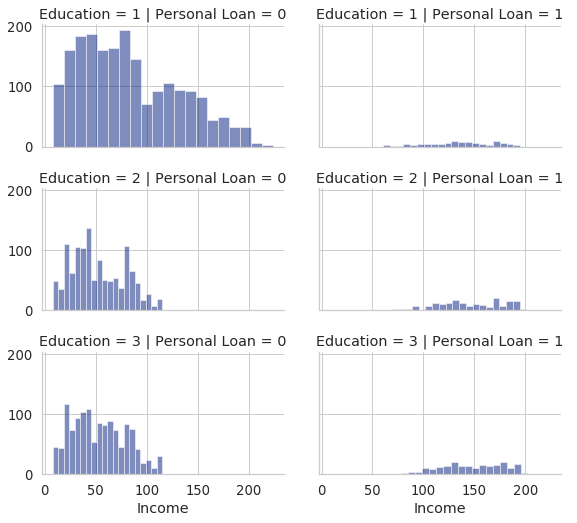

In [28]:
grid = sns.FacetGrid(bank_df, col='Personal Loan', row='Education', size=2.5, aspect=1.6)
grid.map(plt.hist, 'Income', alpha=.5, bins=20)
grid.add_legend();

##### Observation: 
1. Most customer having less than 100K anual income & Education qualification is undergraduate , Rejected the loan.
2. Mejority customers of bank are having less than <100K anual income and Education qualification is undergraduate.

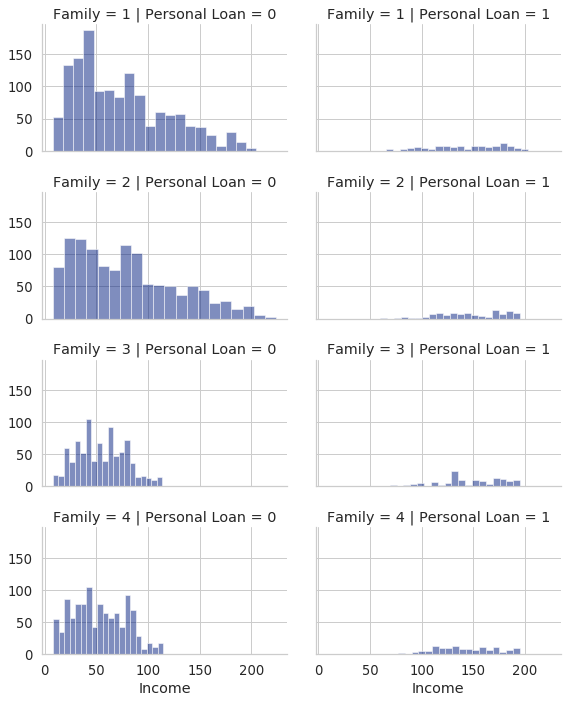

In [ ]:
grid = sns.FacetGrid(bank_df, col='Personal Loan', row='Family', size=2.5, aspect=1.6)
grid.map(plt.hist, 'Income', alpha=.5, bins=20)
grid.add_legend();

**Observation: 
**Single(Family Size-1/Couples(Family Size-2) people are mejority of the customer of Thera Bank.

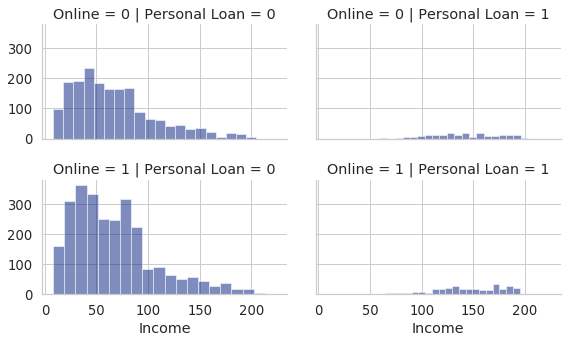

In [30]:
grid = sns.FacetGrid(bank_df, col='Personal Loan', row='Online', size=2.5, aspect=1.6)
grid.map(plt.hist, 'Income', alpha=.5, bins=20)
grid.add_legend();

**Observation: **Customer having high income(Yearly income>120K,does not have net-banking(Online) facility.

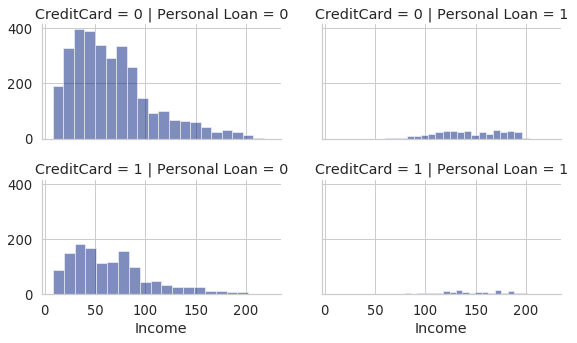

In [31]:
grid = sns.FacetGrid(bank_df, col='Personal Loan', row='CreditCard', size=2.5, aspect=1.6)
grid.map(plt.hist, 'Income', alpha=.5, bins=20)
grid.add_legend();

##### Observation: 
1. Most of the customer of the Bank does not have Credit_card.
2. Customer Having high income,who does not have credit card,has higher rate of loan offer acceptance.

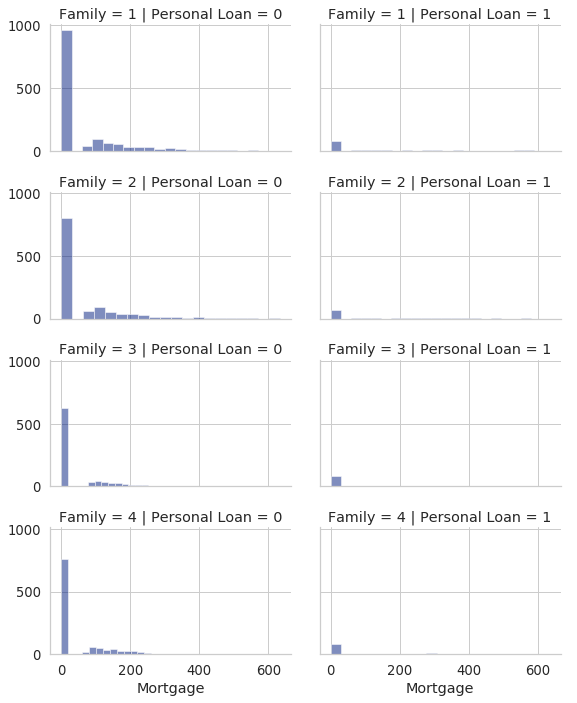

In [32]:
grid = sns.FacetGrid(bank_df, col='Personal Loan', row='Family', size=2.5, aspect=1.6)
grid.map(plt.hist, 'Mortgage', alpha=.5, bins=20)
grid.add_legend();

# Data Cleaning/Wrangle data:

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

##### Correcting by imputing the Data:
Experience feature we saw some negetive value. Lets fix that by compareing with Age.

In [33]:
# Compare the Age, Exp and Education for the person
pd.DataFrame(bank_df[bank_df["Experience"]>0][["Age","Education","Experience"]].sort_values("Age")).head()

,Age,Education,Experience
0,25,1,1
2836,25,1,1
2226,25,1,1
2192,25,1,1
3010,25,1,1


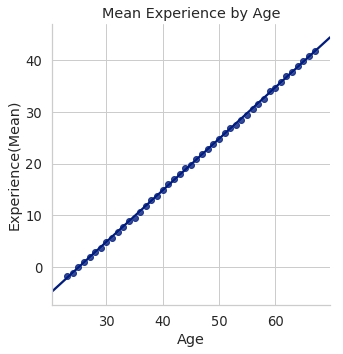

In [34]:
#Lets see if we have any relationship bewteen Exp and Age
df = pd.DataFrame(bank_df.groupby("Age").mean()["Experience"]).reset_index()
fig.set_size_inches(20,6)
sns.lmplot(x='Age',y='Experience',data=df)
plt.ylabel("Experience(Mean)")
plt.title("Mean Experience by Age")
plt.show()

In [35]:
# From the plot, we can see Age and Experience has linear relationship.
#In data set the value was correct but it was captured with wrong sign.let replace the values with absolute value.
bank_df["Experience"] = bank_df["Experience"].apply(abs)

## Create new Feature data:

##### Create perhead income:

In [6]:
bank_df["PP_income_M"] = (((bank_df["Income"]*1000)/12)-((bank_df["CCAvg"]*1000)/12))

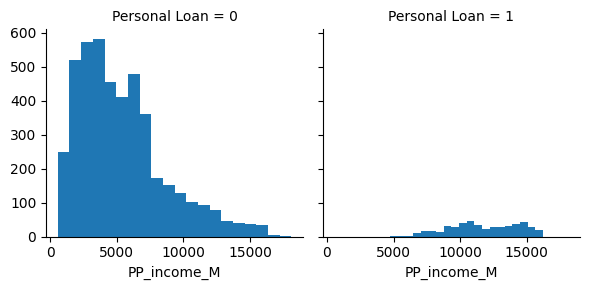

In [7]:
g = sns.FacetGrid(bank_df, col='Personal Loan')
g.map(plt.hist,'PP_income_M', bins=20)

## Correcting by dropping features:
This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the ID and Zip features.

In [8]:
bank_df = bank_df.drop(['ID','ZIP Code'], axis=1)

# Co-relation Map

<Axes: >

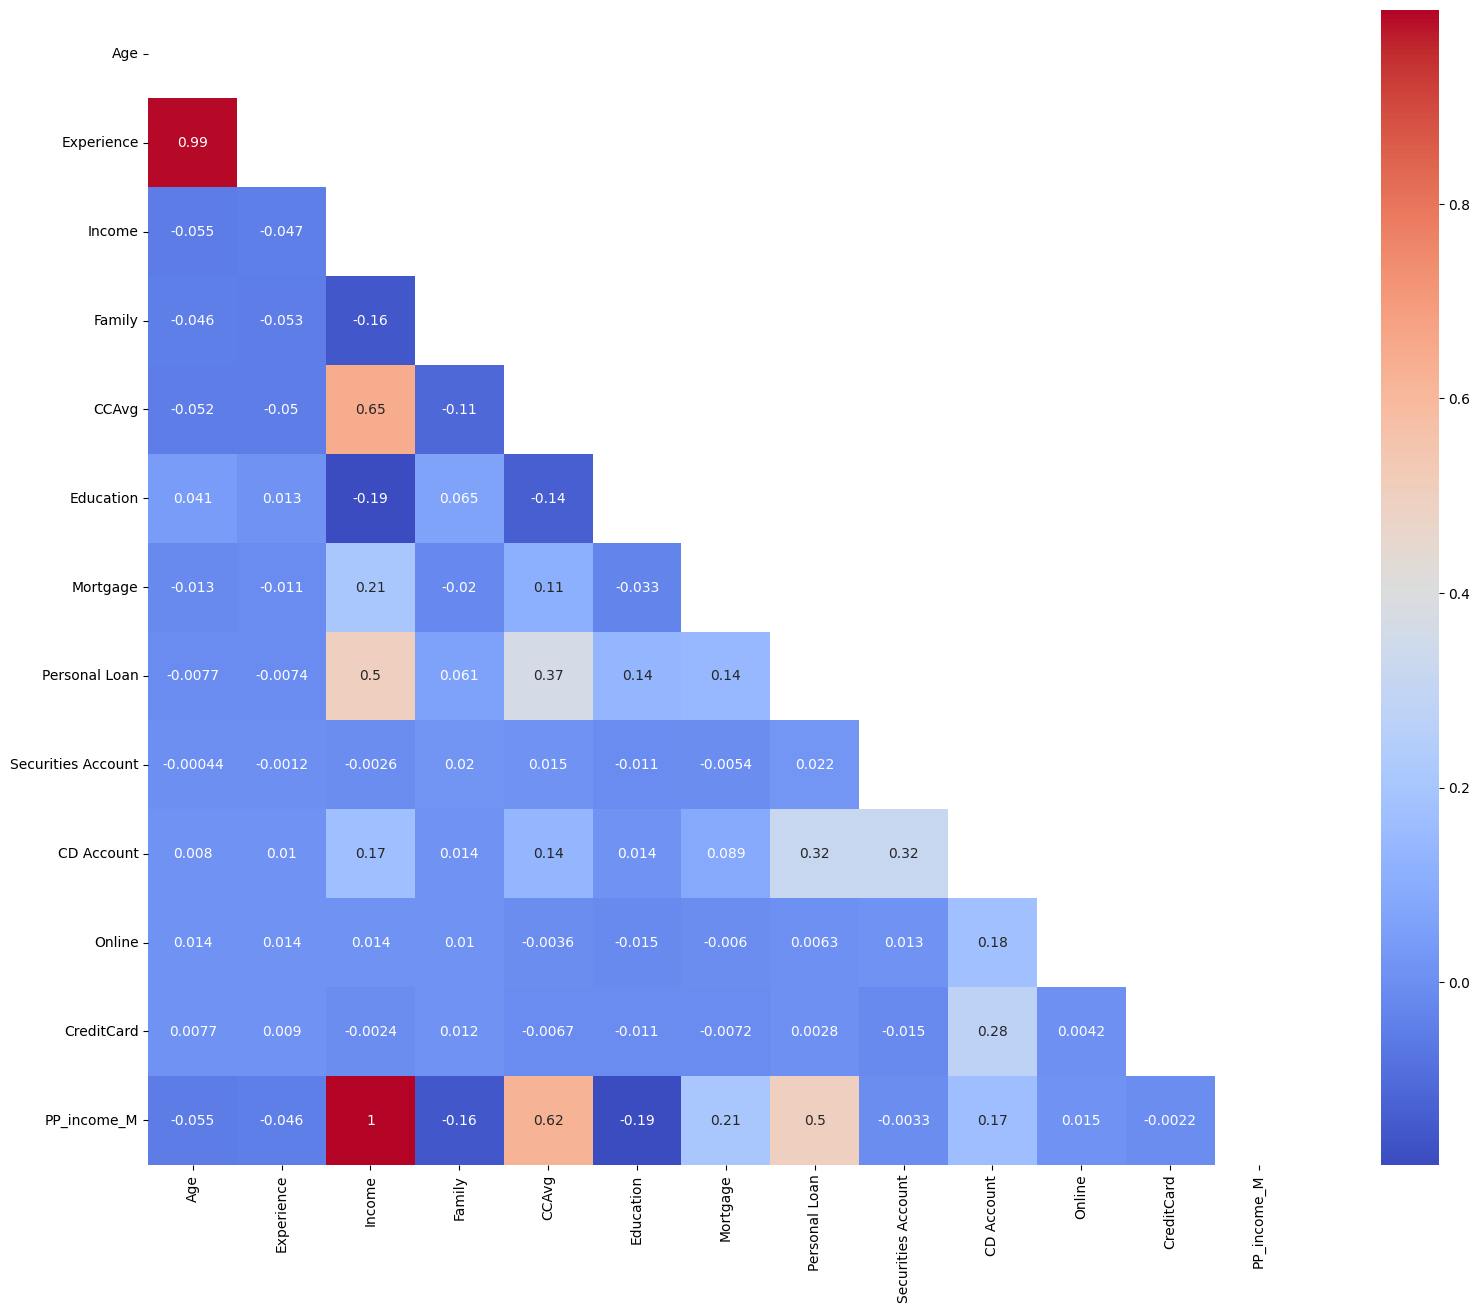

In [9]:
corr = bank_df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,15))
sns.heatmap(corr, mask=mask,annot=True,square=True,cmap="coolwarm")

<Figure size 1440x1440 with 0 Axes>

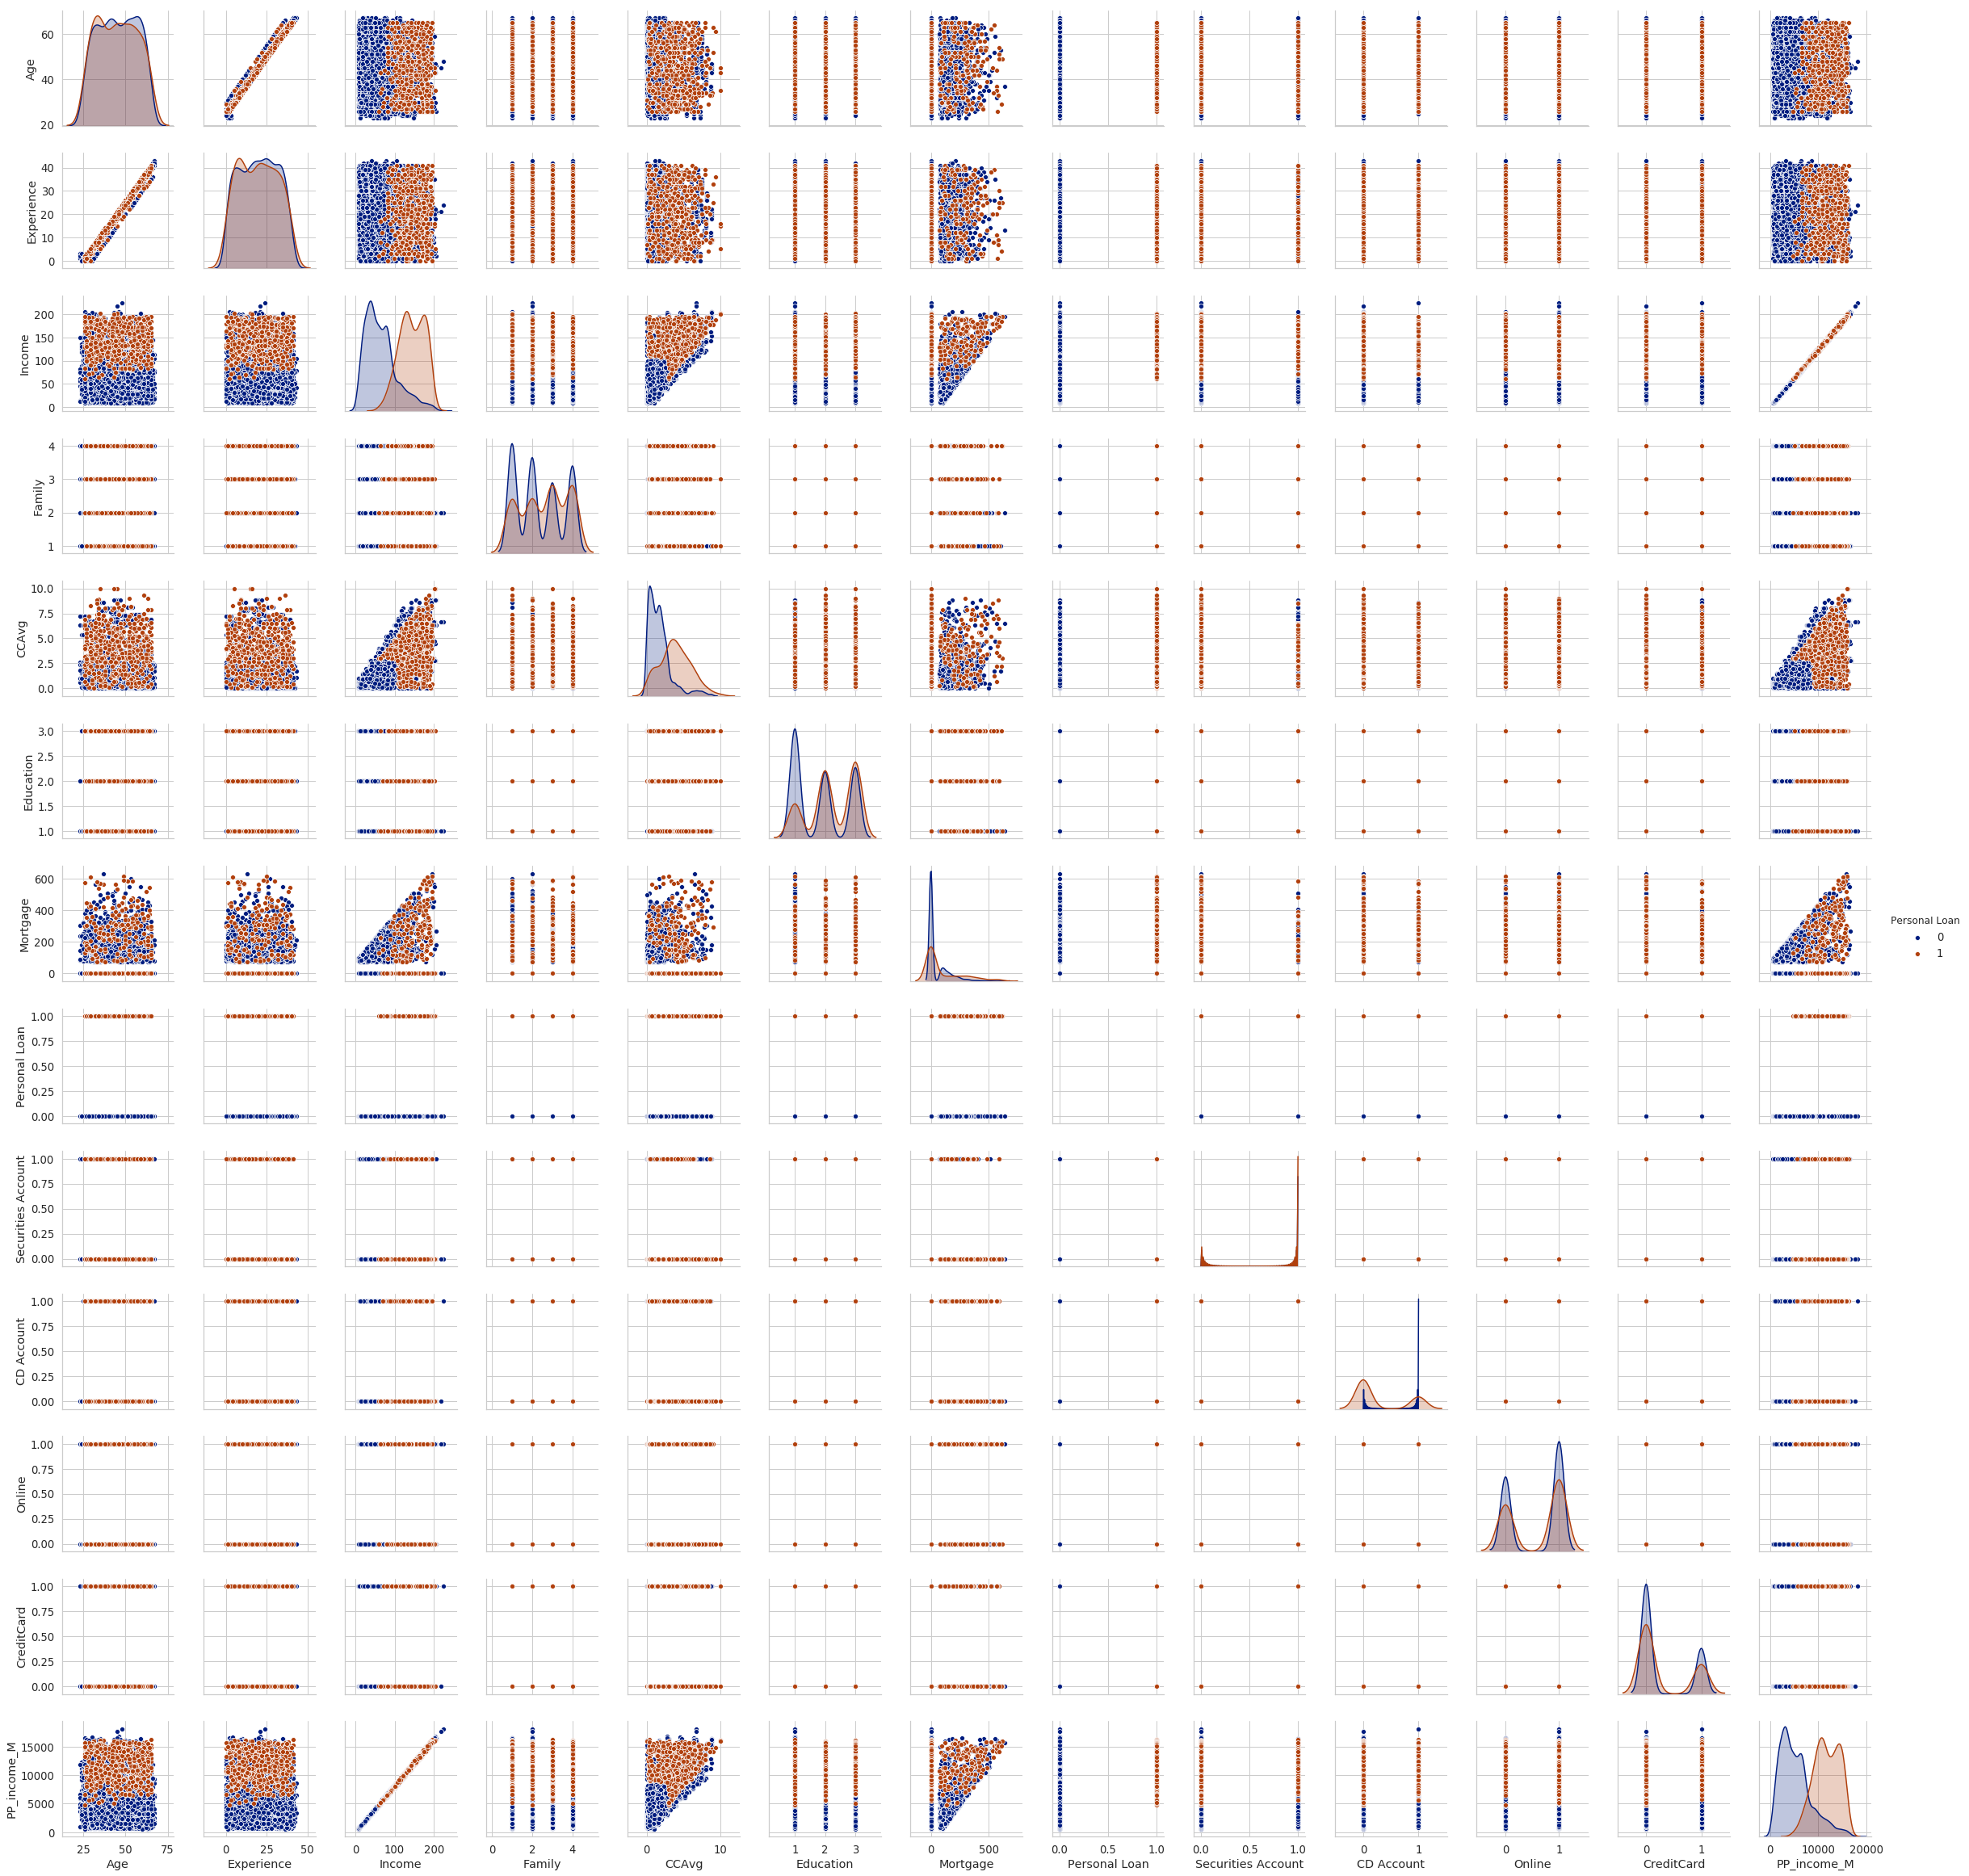

In [40]:
plt.figure(figsize=(20, 20))
sns.pairplot(bank_df,hue="Personal Loan")

# Feature Scaling:

In [31]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale
scaler = StandardScaler()

colscal=['Age', 'Experience', 'Income', 'CCAvg','PP_income_M']

scaler.fit(bank_df[colscal])
scaled_bank_df = pd.DataFrame(scaler.transform(bank_df[colscal]),columns=colscal)
#display(scaled_bank_df.sample(25))
#print(scaler.transform(bank_df[colscal]))

bank_df =bank_df.drop(colscal,axis=1)
#display(bank_df)
bank_df = scaled_bank_df.join(bank_df)
#display(bank_df)

# Test_Train Split

In [28]:
X=bank_df[['Age','Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Securities Account', 'CD Account', 'Online',
       'CreditCard','PP_income_M']]
y=bank_df["Personal Loan"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

# Model:

### Logistic Regration:

In [91]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predict = logmodel.predict(X_test.values)
# print(predict)
predictProb = logmodel.predict_proba(X_test.values)
# print(predictProb)
acc_log=round(metrics.accuracy_score(predict,y_test)*100,2)
# print(acc_log)

[0 0 0 ... 0 0 0]
[[9.99345637e-01 6.54363421e-04]
 [7.72065445e-01 2.27934555e-01]
 [9.99384450e-01 6.15550102e-04]
 ...
 [9.82031705e-01 1.79682952e-02]
 [9.73994668e-01 2.60053320e-02]
 [9.98835472e-01 1.16452842e-03]]
95.07


In [100]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(logmodel, open(filename, 'wb'))

In [102]:
print("**"*40)
print('The accuracy of the Logistic is',metrics.accuracy_score(predict,y_test))
print("__"*40)
print("confusion_matrix :\n",confusion_matrix(y_test, predict))
print("__"*40)
print("\nclassification_report :\n",classification_report(y_test, predict))
print("__"*40)
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))
print("**"*40)

********************************************************************************
The accuracy of the Logistic is 0.9506666666666667
________________________________________________________________________________
confusion_matrix :
 [[1342   12]
 [  62   84]]
________________________________________________________________________________

classification_report :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1354
           1       0.88      0.58      0.69       146

    accuracy                           0.95      1500
   macro avg       0.92      0.78      0.83      1500
weighted avg       0.95      0.95      0.95      1500

________________________________________________________________________________
Recall Score 0.5753424657534246
ROC AUC : 0.9582110843568524
Accuracy : 0.9506666666666667
********************************************************************************


# Logistic Regration with KFold Cross Validation:

In [48]:
score1 =cross_val_score(X=X,y=y,estimator=logmodel,scoring="recall",cv=10)
score2 =cross_val_score(X=X,y=y,estimator=logmodel,scoring="roc_auc",cv=10)
score3 =cross_val_score(X=X,y=y,estimator=logmodel,scoring="accuracy",cv=10)
score4 =cross_val_score(X=X,y=y,estimator=logmodel,scoring="f1",cv=10)
score5 =cross_val_score(X=X,y=y,estimator=logmodel,scoring="average_precision",cv=10)

In [49]:
print("**"*40)
print("Logistic Regression Cross Validation:")
print("\nCross Validation Recall :",score1.mean())
print("Cross Validation Roc Auc :",score2.mean())
print("Cross Validation accuracy :",score3.mean())
print("Cross Validation f1 :",score4.mean())
print("Cross Validation average_precision :",score5.mean())
print("**"*40)

********************************************************************************
Logistic Regression Cross Validation:

Cross Validation Recall : 0.6187500000000001
Cross Validation Roc Auc : 0.9587804203539821
Cross Validation accuracy : 0.9511999999999998
Cross Validation f1 : 0.7075823259811113
Cross Validation average_precision : 0.806439769258391
********************************************************************************


# K-Nearest-Neighbors:

In [50]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [51]:
predict = knn.predict(X_test.values)
predictProb = knn.predict_proba(X_test.values)
acc_knn=round(metrics.accuracy_score(predict,y_test)*100,2)

In [52]:
print("**"*40)
print('The accuracy of the KNN is',metrics.accuracy_score(predict,y_test))
print("__"*40)
print("confusion_matrix :\n",confusion_matrix(y_test, predict))
print("__"*40)
print("\nclassification_report :\n",classification_report(y_test, predict))
print("__"*40)
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print("**"*40)

********************************************************************************
The accuracy of the KNN is 0.968
________________________________________________________________________________
confusion_matrix :
 [[1349    5]
 [  43  103]]
________________________________________________________________________________

classification_report :
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1354
           1       0.95      0.71      0.81       146

    accuracy                           0.97      1500
   macro avg       0.96      0.85      0.90      1500
weighted avg       0.97      0.97      0.97      1500

________________________________________________________________________________
Recall Score 0.7054794520547946
ROC AUC : 0.9243793124380325
********************************************************************************


# K-Nearest-Neighbors with KFold Cross Validation

In [53]:
score1 =cross_val_score(X=X,y=y,estimator=knn,scoring="recall",cv=10)
score2 =cross_val_score(X=X,y=y,estimator=knn,scoring="roc_auc",cv=10)
score3 =cross_val_score(X=X,y=y,estimator=knn,scoring="accuracy",cv=10)
score4 =cross_val_score(X=X,y=y,estimator=knn,scoring="f1",cv=10)
score5 =cross_val_score(X=X,y=y,estimator=knn,scoring="average_precision",cv=10)

In [54]:
print("KNN Cross Validation:")
print("**"*40)
print("\nCross Validation Recall :",score1.mean())
print("Cross Validation Roc Auc :",score2.mean())
print("Cross Validation accuracy :",score3.mean())
print("Cross Validation f1 :",score4.mean())
print("Cross Validation average_precision :",score5.mean())
print("**"*40)

KNN Cross Validation:
********************************************************************************

Cross Validation Recall : 0.7333333333333334
Cross Validation Roc Auc : 0.9417496312684366
Cross Validation accuracy : 0.9724
Cross Validation f1 : 0.8357018895800321
Cross Validation average_precision : 0.8677206393106556
********************************************************************************


# K-Nearest-Neighbors with GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV
k = np.arange(1,10,1)

In [56]:
parameters = {'n_neighbors': k, 
              'weights': ["uniform","distance"], 
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

acc_scorer = make_scorer(accuracy_score)

In [57]:
grid_obj = GridSearchCV(knn, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

In [58]:
print("**"*40)
print('The accuracy of the KNN is',metrics.accuracy_score(predict,y_test))

********************************************************************************
The accuracy of the KNN is 0.968


In [59]:
predict = grid_obj.predict(X_test.values)
predictProb = grid_obj.predict_proba(X_test.values)

In [60]:
print("**"*40)
print('The accuracy of the KNN with GridSearchCV is',metrics.accuracy_score(y_test,predict))
print("__"*40)
print("confusion_matrix :\n",confusion_matrix(y_test, predict))
print("__"*40)
print("\nclassification_report :\n",classification_report(y_test, predict))
print("__"*40)
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))
print("**"*40)

********************************************************************************
The accuracy of the KNN with GridSearchCV is 0.9693333333333334
________________________________________________________________________________
confusion_matrix :
 [[1346    8]
 [  38  108]]
________________________________________________________________________________

classification_report :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1354
           1       0.93      0.74      0.82       146

    accuracy                           0.97      1500
   macro avg       0.95      0.87      0.90      1500
weighted avg       0.97      0.97      0.97      1500

________________________________________________________________________________
Recall Score 0.7397260273972602
ROC AUC : 0.8669088039497379
Accuracy : 0.9693333333333334
********************************************************************************


In [61]:
from sklearn import model_selection
# subsetting just the odd ones
neighbors = list(np.arange(1,20,2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores =model_selection.cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 1


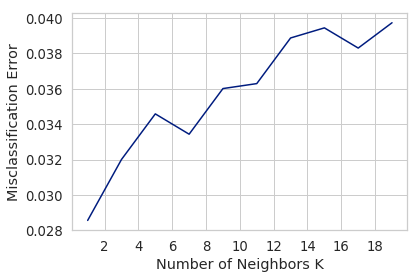

In [62]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors,MSE)
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Naïve Bayes:

In [63]:
gb = GaussianNB()
gb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
predict = gb.predict(X_test)
predictProb = gb.predict_proba(X_test)
acc_nb=round(metrics.accuracy_score(predict,y_test)*100,2)

In [65]:
print("**"*40)
print('The accuracy of the Naïve Bayes is',metrics.accuracy_score(predict,y_test))
print("__"*40)
print("confusion_matrix :\n",confusion_matrix(y_test, predict))
print("__"*40)
print("\nclassification_report :\n",classification_report(y_test, predict))
print("__"*40)
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))
print("**"*40)

********************************************************************************
The accuracy of the Naïve Bayes is 0.8846666666666667
________________________________________________________________________________
confusion_matrix :
 [[1229  125]
 [  48   98]]
________________________________________________________________________________

classification_report :
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      1354
           1       0.44      0.67      0.53       146

    accuracy                           0.88      1500
   macro avg       0.70      0.79      0.73      1500
weighted avg       0.91      0.88      0.90      1500

________________________________________________________________________________
Recall Score 0.6712328767123288
ROC AUC : 0.9344205904372636
Accuracy : 0.8846666666666667
********************************************************************************


# Naïve Bayes with KFold cross validation:

In [66]:
score1 =cross_val_score(X=X,y=y,estimator=gb,scoring="recall",cv=10)
score2 =cross_val_score(X=X,y=y,estimator=gb,scoring="roc_auc",cv=10)
score3 =cross_val_score(X=X,y=y,estimator=gb,scoring="accuracy",cv=10)
score4 =cross_val_score(X=X,y=y,estimator=gb,scoring="f1",cv=10)
score5 =cross_val_score(X=X,y=y,estimator=gb,scoring="average_precision",cv=10)

In [67]:
print("Naïve Bayes Cross Validation:")
print("**"*40)
print("\nCross Validation Recall :",score1.mean())
print("Cross Validation Roc Auc :",score2.mean())
print("Cross Validation accuracy :",score3.mean())
print("Cross Validation f1 :",score4.mean())
print("Cross Validation average_precision :",score5.mean())
print("**"*40)

Naïve Bayes Cross Validation:
********************************************************************************

Cross Validation Recall : 0.7166666666666666
Cross Validation Roc Auc : 0.937214233038348
Cross Validation accuracy : 0.8904
Cross Validation f1 : 0.5562992696631859
Cross Validation average_precision : 0.6138741359349238
********************************************************************************


# Model evaluation
We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [68]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression','Naive Bayes'],
    'Score': [acc_knn, acc_log, acc_nb, 
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,96.80
1,Logistic Regression,95.07
2,Naive Bayes,88.47


# References
This notebook has been created based on great work done solving the Titanic competition and other sources.
1. https://www.kaggle.com/startupsci/titanic-data-science-solutions .
2. https://www.kaggle.com/iconoclash/personal-loan-dataset-binary-classification.